## pubs accessibility

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm

In [2]:
# Load the shapefile and CSV data
shp_file = 'MSOA_2011_London_gen_MHW.shp'
csv_file = 'pub_sum.csv'

In [3]:
# Read the shapefile and CSV data
gdf = gpd.read_file(shp_file)
df = pd.read_csv(csv_file)

In [4]:
# Merge the data on MSOA code
merged_data = gdf.merge(df, left_on='MSOA11CD', right_on='category', how='left')


In [5]:
# Replace NaN values in 'mean' column to indicate missing data
merged_data['mean'].fillna(-1, inplace=True)

In [6]:
# Calculate quartiles for the non-missing data
non_missing_data = merged_data[merged_data['mean'] > 0]['mean']
quartiles = np.percentile(non_missing_data, [25, 50, 75])

In [7]:
# Function to define category labels
def define_category_label(row):
    if row['mean'] == -1:
        return 'Missing Data'
    elif row['mean'] == 0:
        return '0'
    elif row['mean'] <= quartiles[0]:
        return f'0 - {quartiles[0]:.2f}'
    elif row['mean'] <= quartiles[1]:
        return f'{quartiles[0]:.2f} - {quartiles[1]:.2f}'
    elif row['mean'] <= quartiles[2]:
        return f'{quartiles[1]:.2f} - {quartiles[2]:.2f}'
    else:
        return f'{quartiles[2]:.2f} - {non_missing_data.max():.2f}'

In [8]:
# Apply the function to update the 'category' column
merged_data['category'] = merged_data.apply(define_category_label, axis=1)

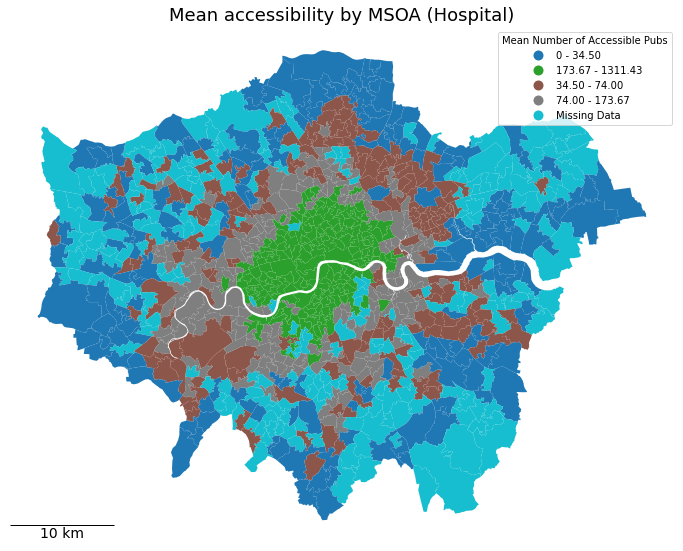

In [9]:
# Plotting the data with updated legend
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
merged_data.plot(column='category', ax=ax, legend=True, categorical=True, legend_kwds={'loc': 'upper right', 'title': 'Mean Number of Accessible Pubs'})

# Add a scale bar for 10 kilometers
scalebar = AnchoredSizeBar(ax.transData,
                           10000, '10 km', 'lower left', 
                           pad=0.1,
                           color='black',
                           frameon=False,
                           size_vertical=1,
                           fontproperties=fm.FontProperties(size=14))

ax.add_artist(scalebar)

# Remove axis labels, ticks, and border
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('')
ax.set_ylabel('')
for spine in ax.spines.values():
    spine.set_visible(False)

# Add title
ax.set_title('Mean accessibility by MSOA (Hospital)' , fontsize=18)

plt.show()